##Analyzing Mobile Usage Patterns and User Behavior Classification Across Devices

**About Dataset**

This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

**Key Features:**

1. User ID: Unique identifier for each user.
2. Device Model: Model of the user's smartphone.
3. Operating System: The OS of the device (iOS or Android).
4. App Usage Time: Daily time spent on mobile applications, measured in minutes.
5. Screen On Time: Average hours per day the screen is active.
6. Battery Drain: Daily battery consumption in mAh.
7. Number of Apps Installed: Total apps available on the device.
8. Data Usage: Daily mobile data consumption in megabytes.
9. Age: Age of the user.
10. Gender: Gender of the user (Male or Female).
11. User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

**This dataset is ideal for researchers, data scientists, and analysts interested in understanding mobile user behavior and developing predictive models in the realm of mobile technology and applications. This Dataset was primarily designed to implement machine learning algorithms and is not a reliable source for a paper or article.**

**This dataset can be used for:**

1. Analyzing mobile user behavior patterns
2. Building predictive models for app usage
3. Conducting research on mobile technology and user engagement
4. Developing insights into battery and data consumption trends

**Importing Necessary Libraries**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**load the dataset**

In [57]:
df = pd.read_csv("/content/user_behavior_dataset.csv")

**data assessing**

In [58]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [59]:
df.shape

(700, 11)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [61]:
#checking for missing values
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [62]:
#describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


In [63]:
df.nunique()

,0
User ID,700
Device Model,5
Operating System,2
App Usage Time (min/day),387
Screen On Time (hours/day),108
Battery Drain (mAh/day),628
Number of Apps Installed,86
Data Usage (MB/day),585
Age,42
Gender,2


**We dont have any missing values and the data is cleaned we can go further for analysis**

**Univariate Analysis**

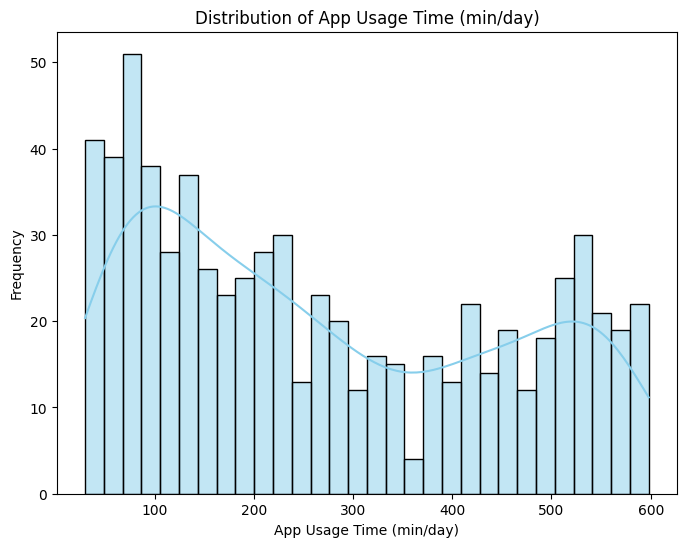

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

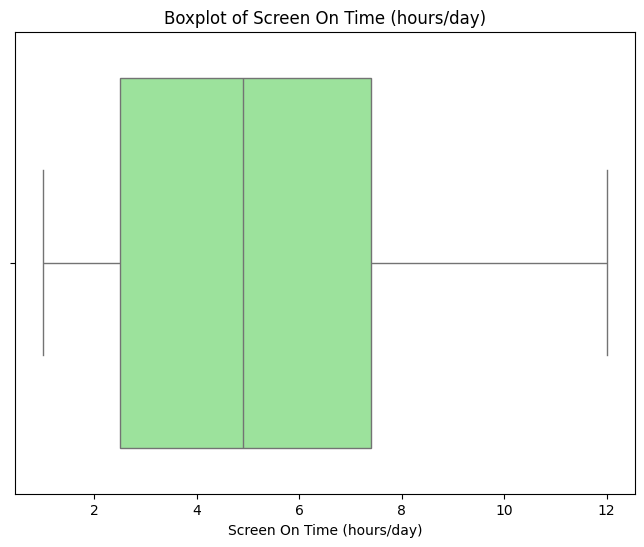

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='lightgreen')
plt.title('Boxplot of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.show()

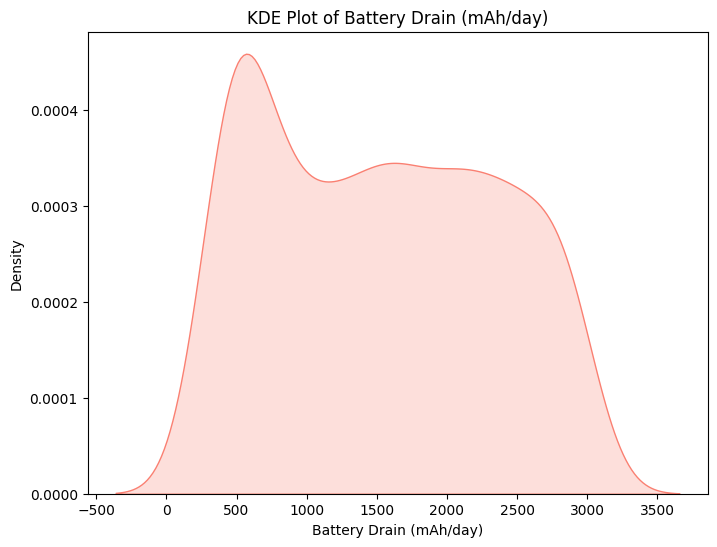

In [66]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True, color='salmon')
plt.title('KDE Plot of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.show()

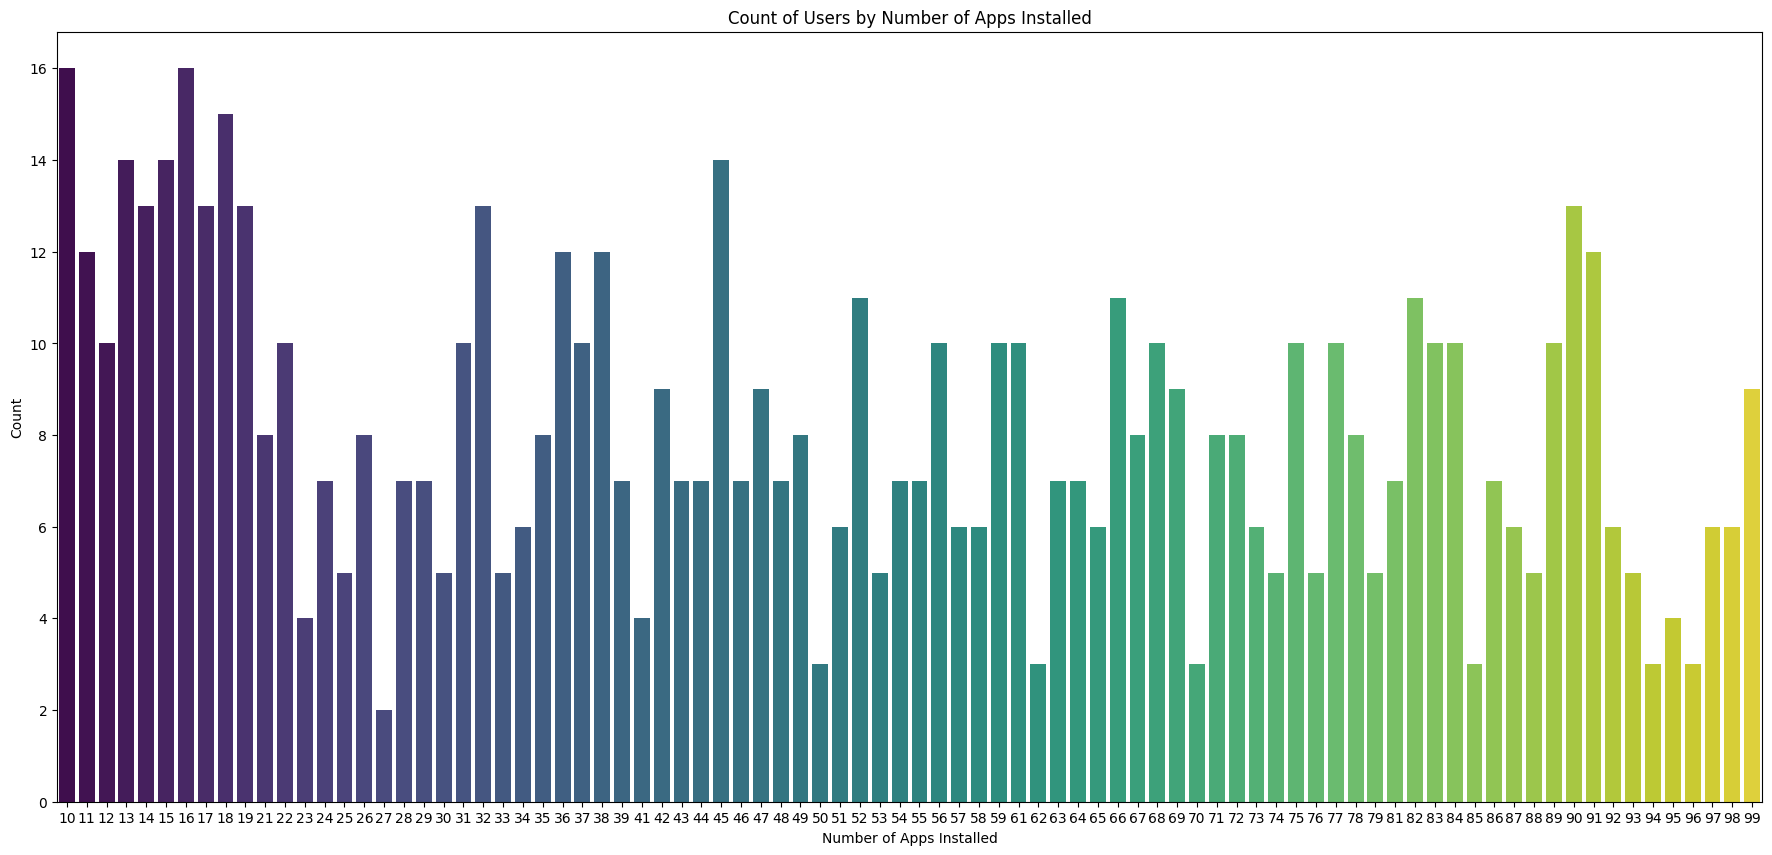

In [67]:
plt.figure(figsize=(22, 10))
sns.countplot(x='Number of Apps Installed', data=df, palette='viridis')
plt.title('Count of Users by Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Count')
plt.show()

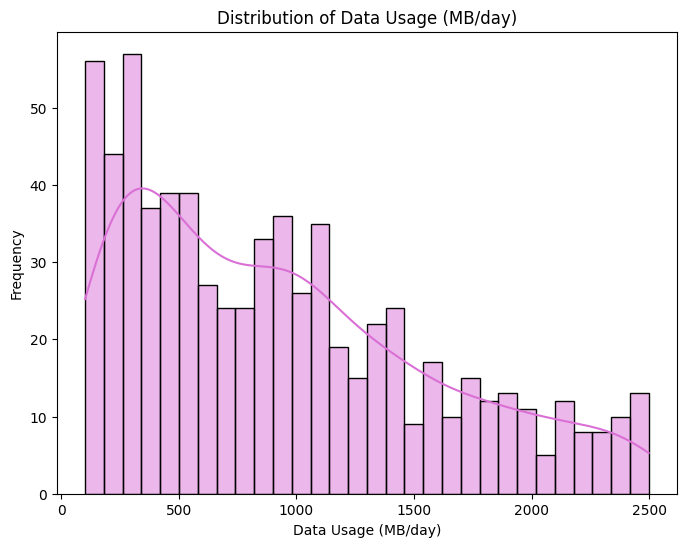

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Data Usage (MB/day)'], bins=30, color='orchid', kde=True)
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

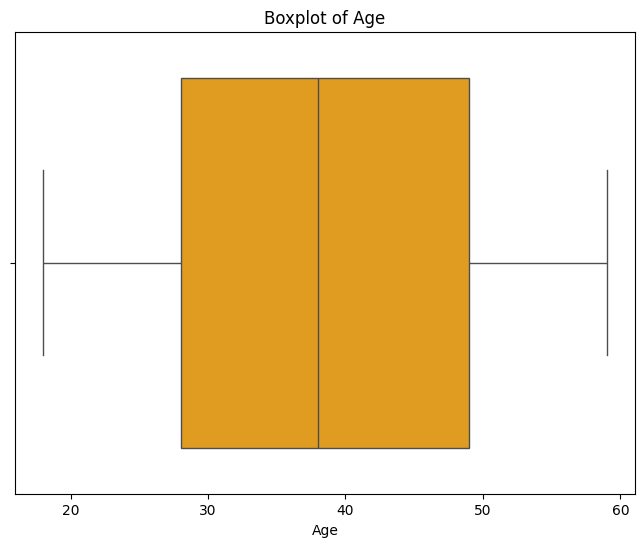

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='orange')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

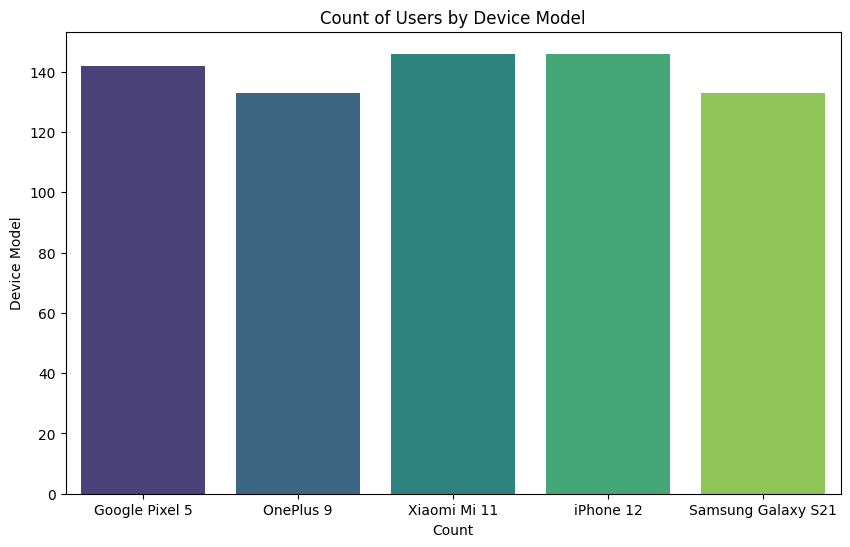

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Device Model'], data=df, palette='viridis')
plt.title('Count of Users by Device Model')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()

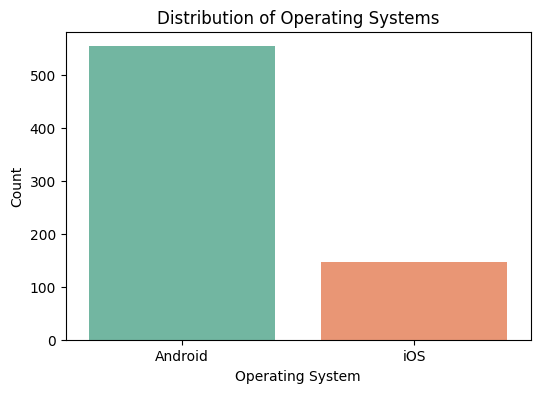

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Operating System', data=df, palette='Set2')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

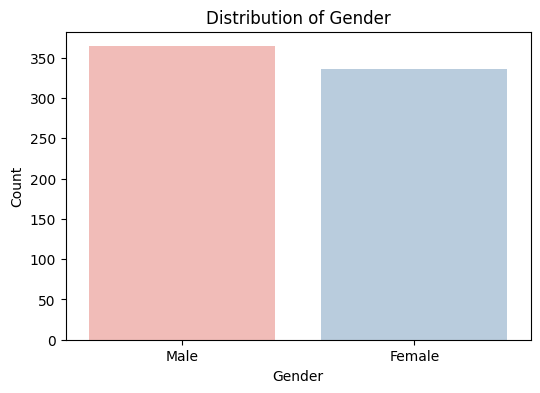

In [72]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Pastel1')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

***BIVARIATE ANALYSIS***

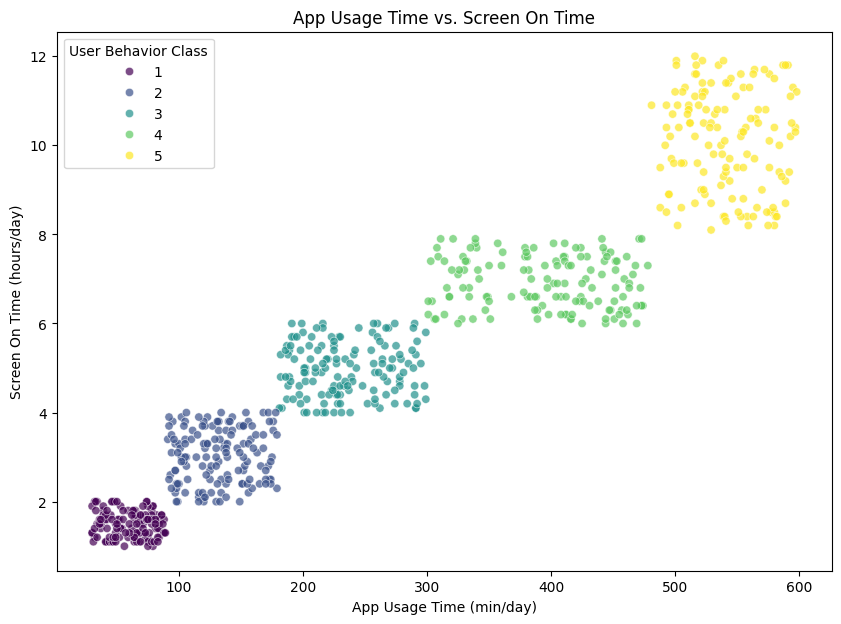

In [73]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='App Usage Time (min/day)',
    y='Screen On Time (hours/day)',
    hue='User Behavior Class',
    palette='viridis',
    alpha=0.7
)
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='User Behavior Class')
plt.show()

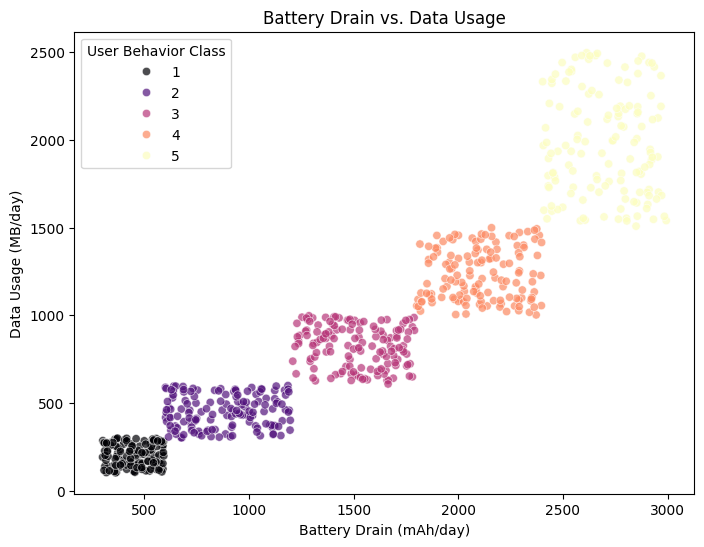

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Battery Drain (mAh/day)', y='Data Usage (MB/day)', hue='User Behavior Class', palette='magma', alpha=0.7)
plt.title('Battery Drain vs. Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

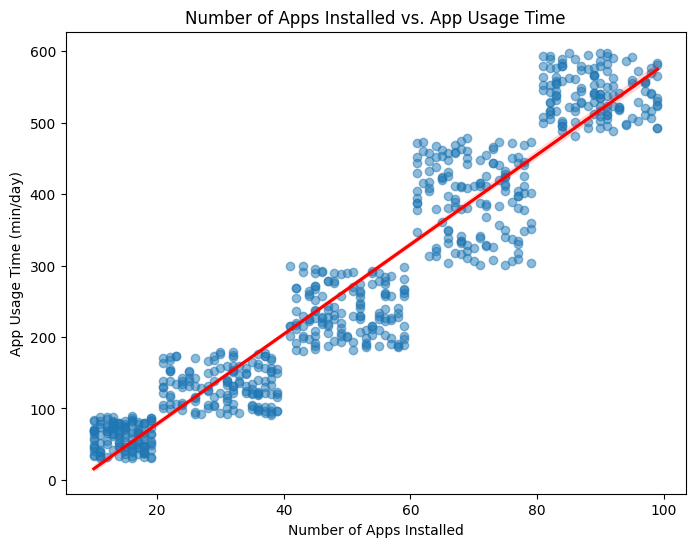

In [75]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Number of Apps Installed', y='App Usage Time (min/day)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Number of Apps Installed vs. App Usage Time')
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time (min/day)')
plt.show()

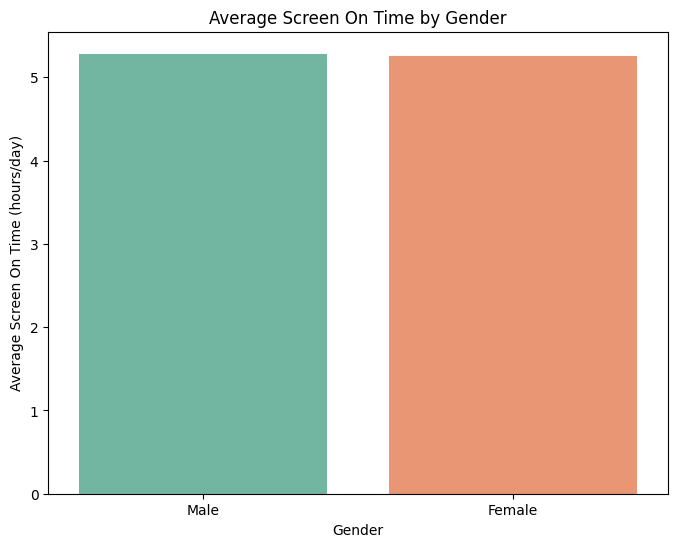

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df, palette='Set2', ci=None)
plt.title('Average Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Screen On Time (hours/day)')
plt.show()

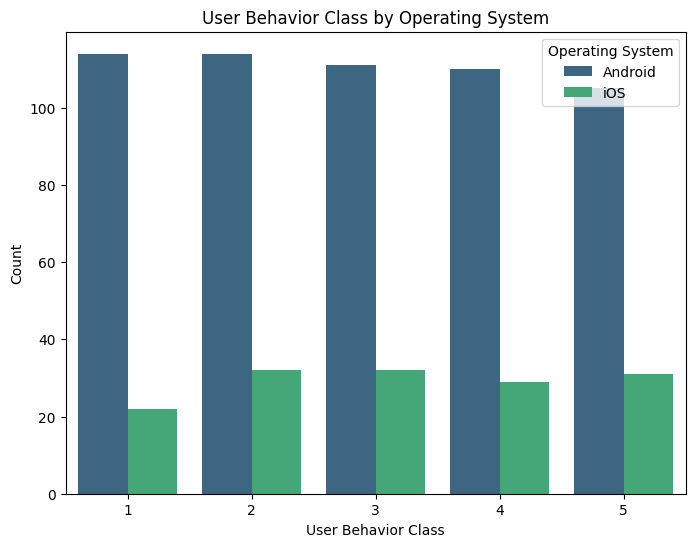

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Operating System', data=df, palette='viridis')
plt.title('User Behavior Class by Operating System')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()

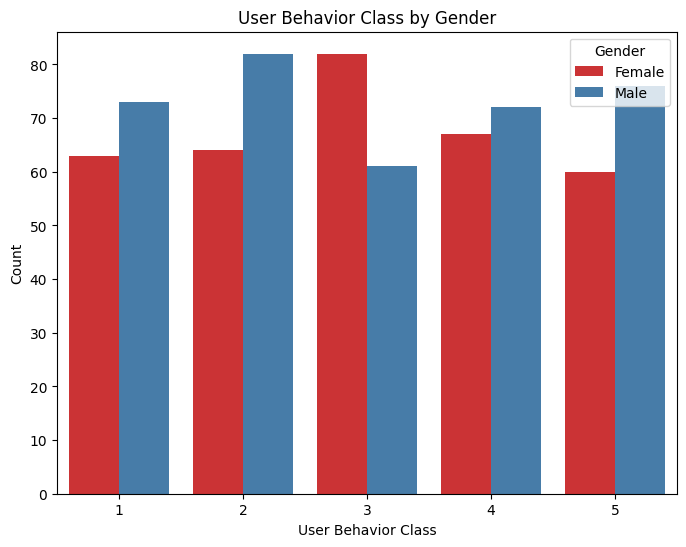

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Gender', data=df, palette='Set1')
plt.title('User Behavior Class by Gender')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

**Multivariate Analysis**

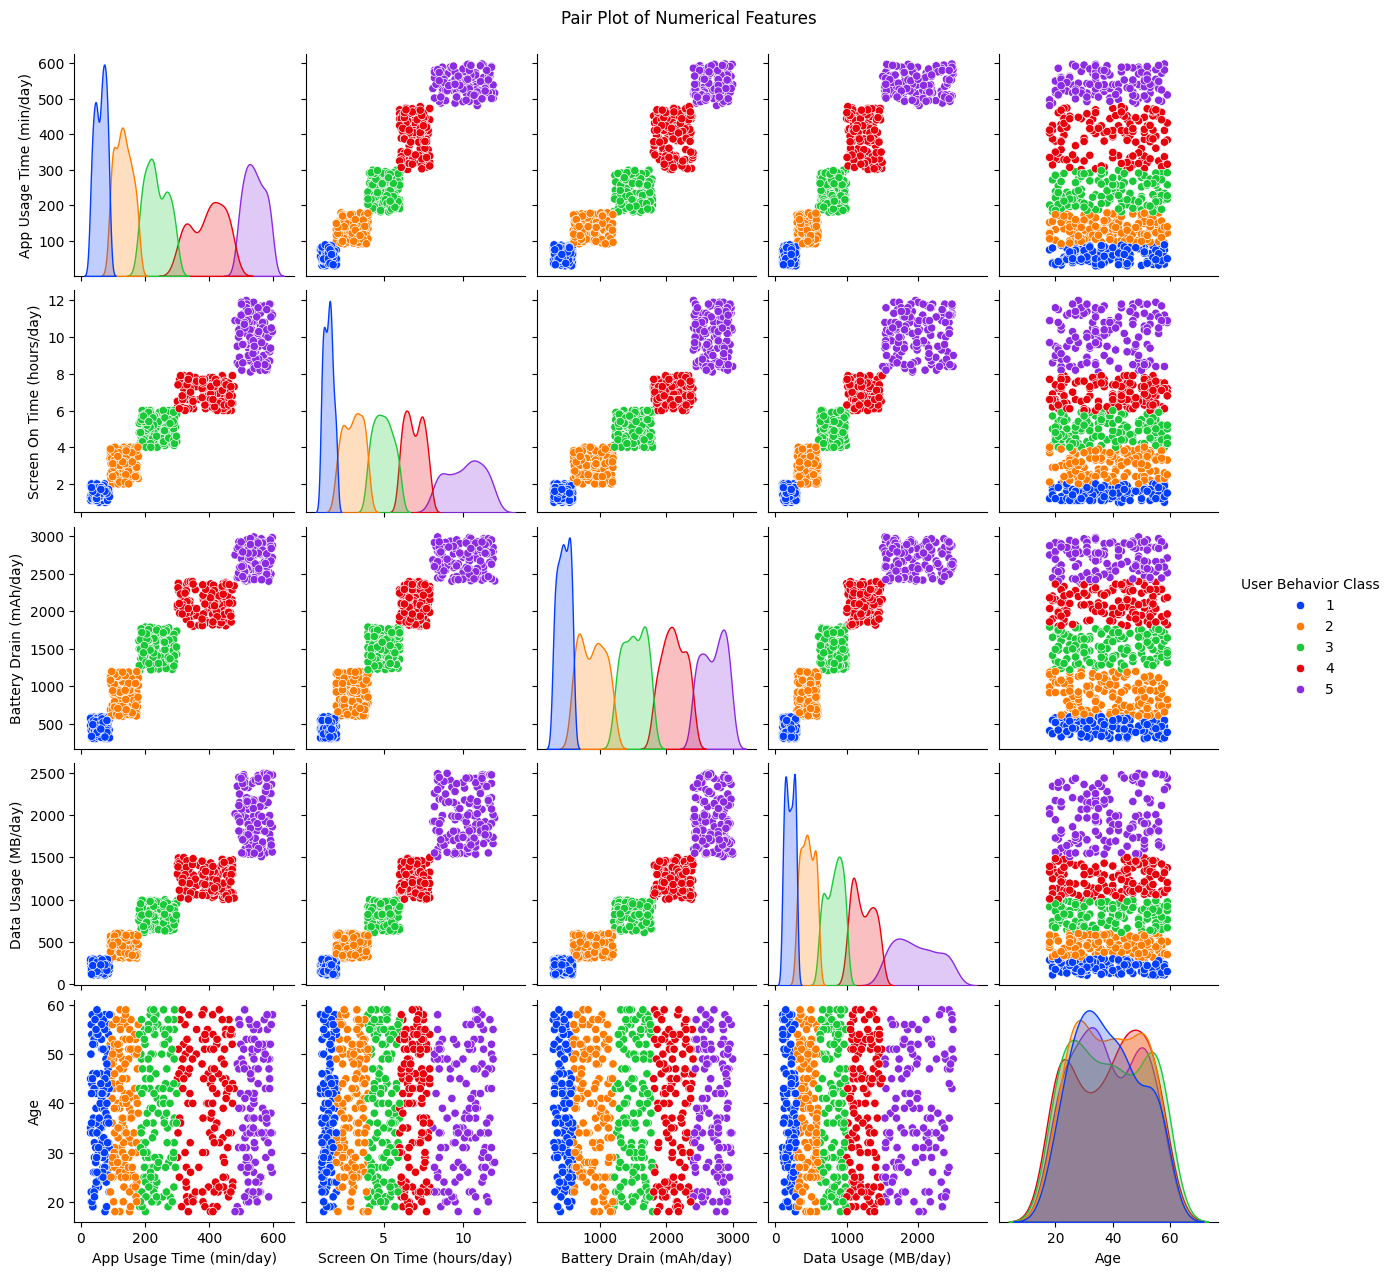

In [79]:
sns.pairplot(df, vars=['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age'], hue='User Behavior Class', palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

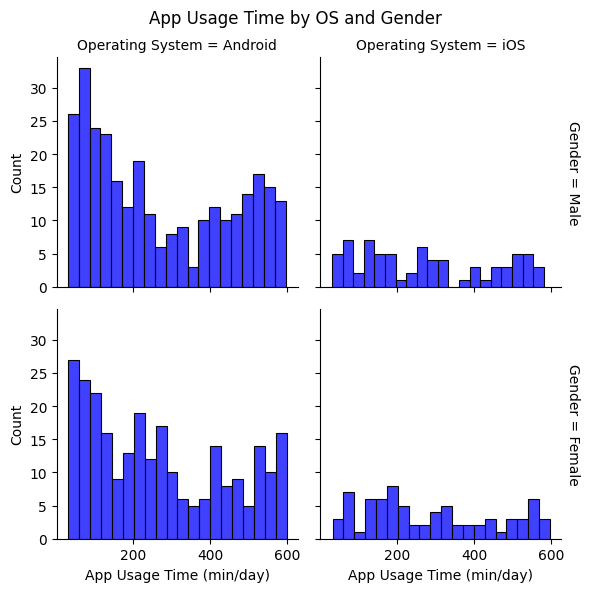

In [80]:
g = sns.FacetGrid(df, col='Operating System', row='Gender', margin_titles=True, palette='Set2')
g.map(sns.histplot, 'App Usage Time (min/day)', bins=20, kde=False, color='blue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('App Usage Time by OS and Gender')
plt.show()

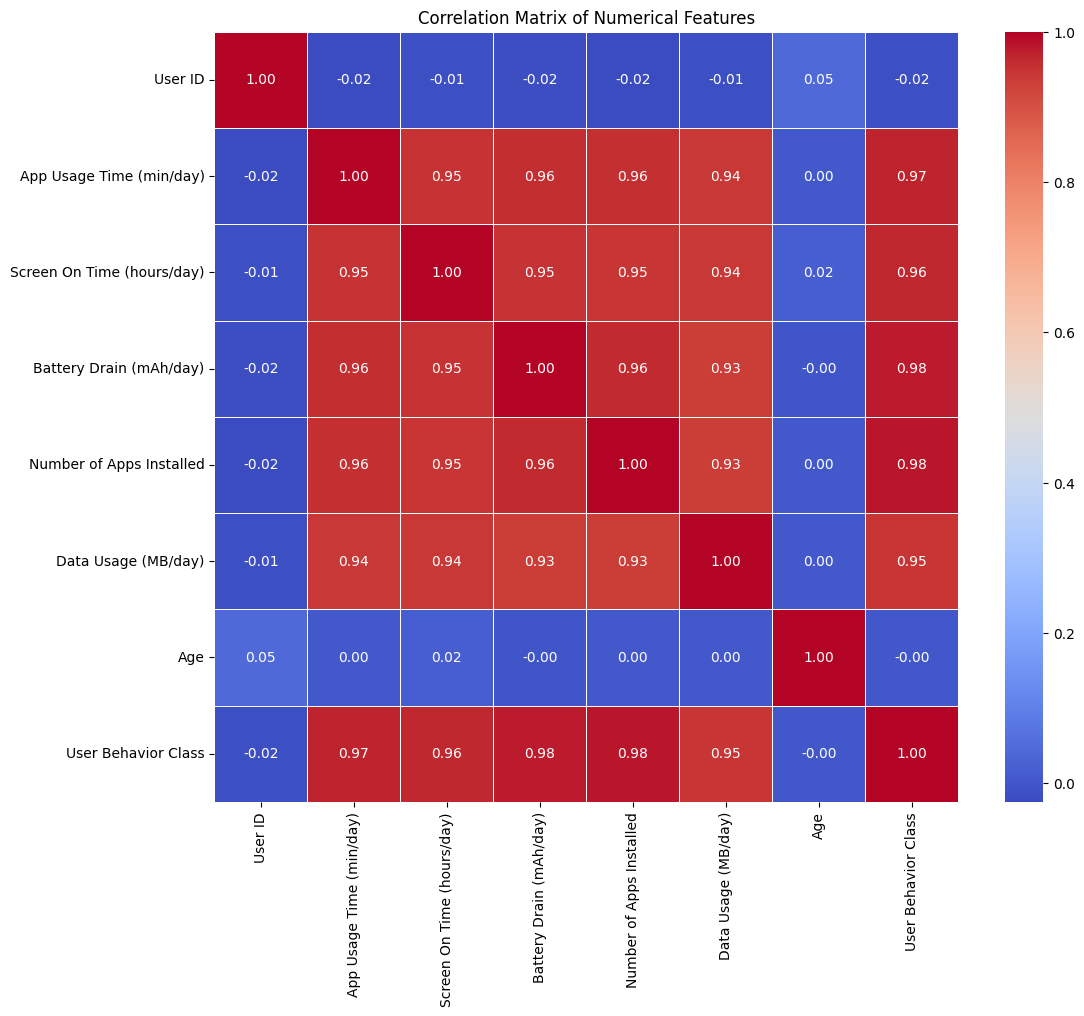

In [81]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

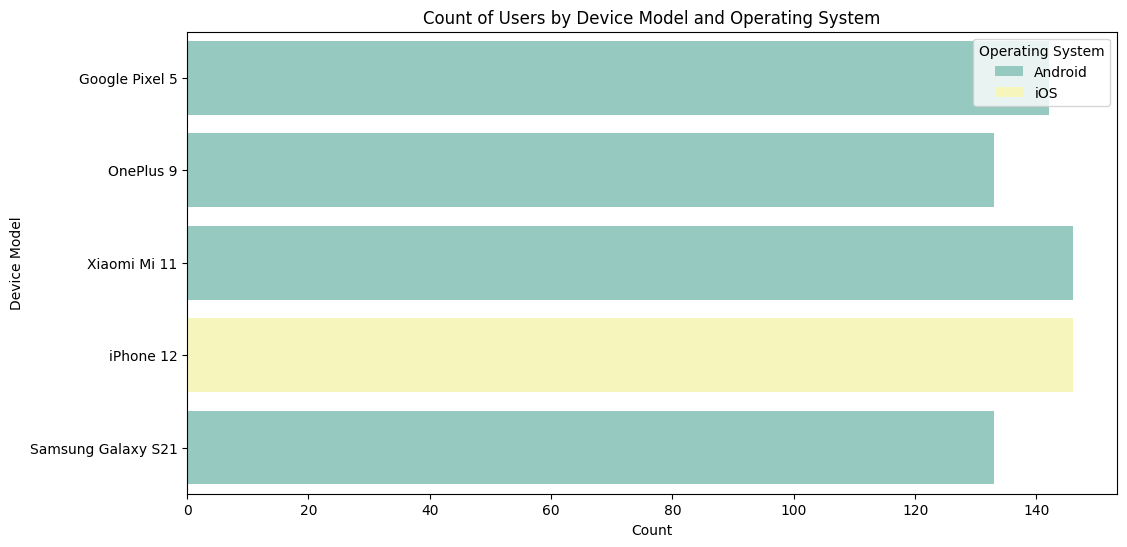

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Device Model', hue='Operating System', data=df, palette='Set3')
plt.title('Count of Users by Device Model and Operating System')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.legend(title='Operating System')
plt.show()

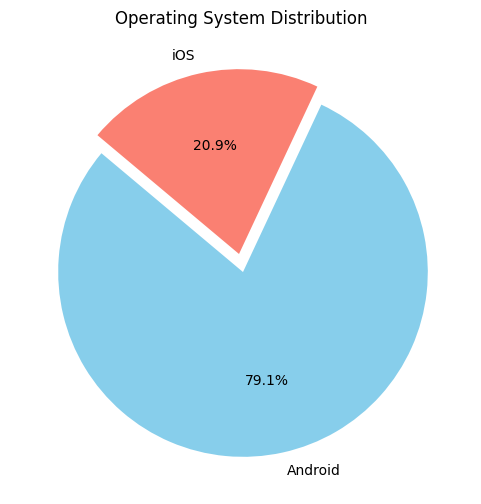

In [83]:
plt.figure(figsize=(6, 6))
df['Operating System'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, explode=[0.05, 0.05])
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()

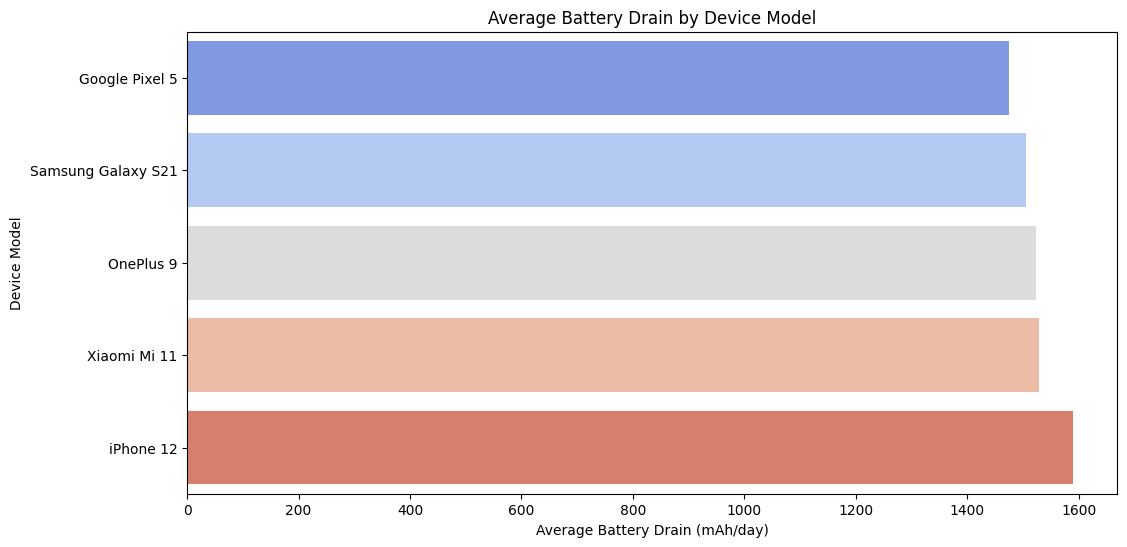

In [84]:
plt.figure(figsize=(12, 6))
avg_battery = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().sort_values()
sns.barplot(x=avg_battery.values, y=avg_battery.index, palette='coolwarm')
plt.title('Average Battery Drain by Device Model')
plt.xlabel('Average Battery Drain (mAh/day)')
plt.ylabel('Device Model')
plt.show()

**Model Building**

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
 [[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 41]]


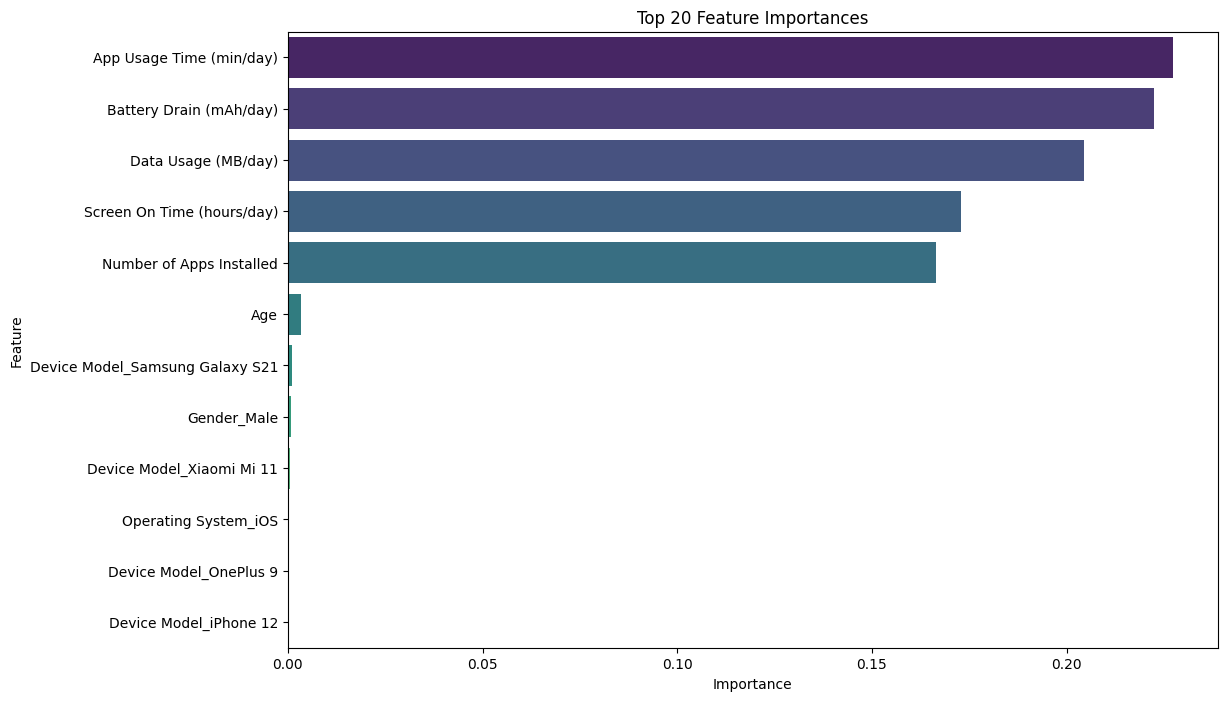

In [85]:
X = df.drop(['User ID', 'User Behavior Class'], axis=1)
y = df['User Behavior Class']


categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


if hasattr(model.named_steps['classifier'], 'feature_importances_'):

    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))

    importances = model.named_steps['classifier'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances')
    plt.show()

Mean Absolute Error (MAE): 191.05714285714285
Mean Squared Error (MSE): 60535.77142857143
Root Mean Squared Error (RMSE): 246.04018254864678
R-squared (R²): 0.9063803334051906


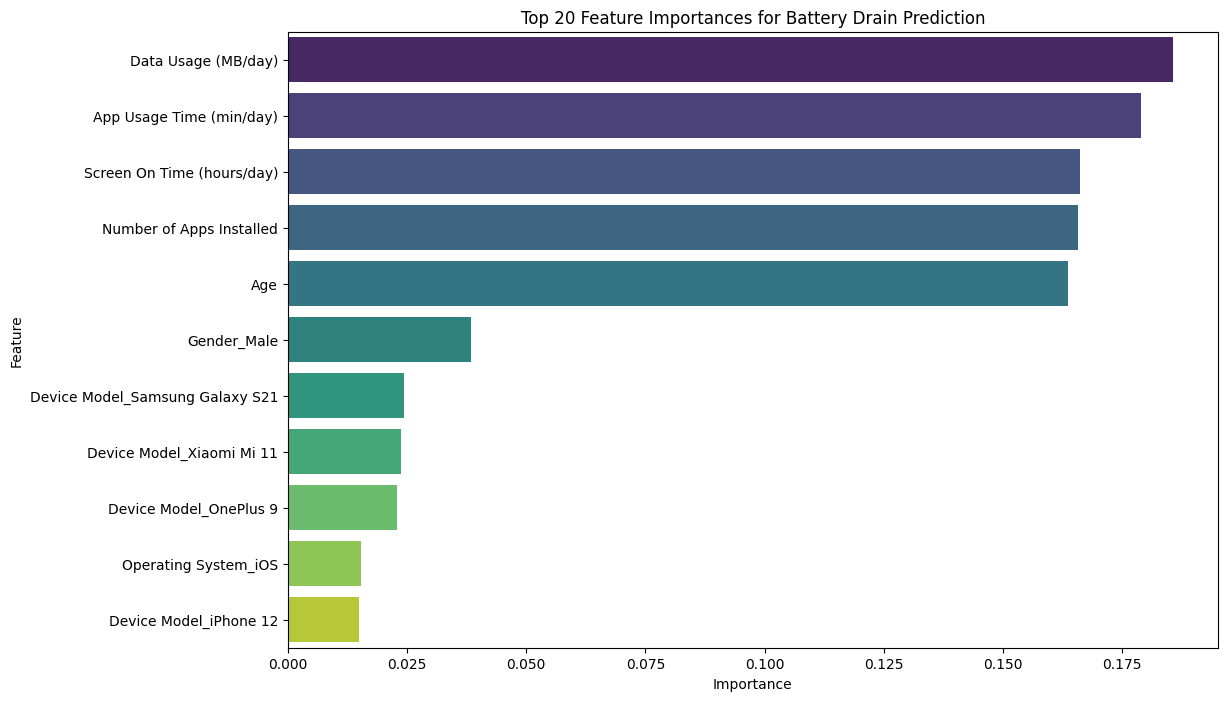

In [86]:
X = df.drop(['User ID', 'Battery Drain (mAh/day)'], axis=1)
y = df['Battery Drain (mAh/day)']

categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R²):", r2_score(y_test, y_pred))

if hasattr(model.named_steps['regressor'], 'feature_importances_'):

    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))

    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances for Battery Drain Prediction')
    plt.show()